# Project Stage 1 : Titanic - Machine Learning from Disaster
Name: Jin Young Park

Kaggle Account: User Name - jpark703 / Display Name - Jin Young Park  [1 point]

This project is to find the passengers of the Titanic who are most likely to survive. 

A detailed description according to Kaggle is as follows:

> **The Challenge**

> The sinking of the Titanic is one of the most infamous shipwrecks in history.


> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.



> While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


> In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


Reference:
[Titanic - Machine Learning from Disaster | Kaggle](https://www.kaggle.com/c/titanic/overview)

-----------------------------------------

## Part1. Problem Formulation/Introduction

### 1.1. Data Problem [3 points]

You need to carefully read the description of your chosen Kaggle competition and formulate the data problem you are going to solve similar to what we have discussed in class. Points will be deducted if the problem is not correctly describing the corresponding Kaggle problem or the problem formulation is not clear to understand even judge the previous point. [3 points]

In this project, the question is that “what sorts of people were more likely to survive?” In other words, the project's data problem is to find passengers most likely to survive the sinking of the Titanic on April 15, 1912, using passenger information on the Titanic.


### 1.2. Population [2 points]

According to the problem, what's the data population? [2 points]

Passengers aboard the Titanic on April 15, 1912

## Part2. Data

### 2.1. Data Loading [5 points]

After you download the data, you need to load them to your notebook, show several lines of each separate file and describe what is that data for. [5 points]

#### 2.1.a. Getting the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TCSS_551/Titanic_data/

/content/drive/MyDrive/TCSS_551/Titanic_data


#### 2.1.b. Importing the Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

**train.csv**


In [ ]:
train_file='train.csv'
print(train_file, "======================")
with open(train_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

train.csv ======================
0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'
10 	 '10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n'
11 	 '11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7

The 'train.csv' is a training set that contains the features of each passenger and the result of whether the passenger survived or died. Also, the result of whether the passengers survived or died is a predictable outcome for this project.

**test.csv**

In [ ]:
test_file='test.csv'
print(test_file, "======================")
with open(test_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

test.csv ======================
0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'
5 	 '896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\n'
6 	 '897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\n'
7 	 '898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\n'
8 	 '899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\n'
9 	 '900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\n'
10 	 '901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\n'
11 	 '902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\n'
12 	 '903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\n'
13 	 '904,1,"Snyder, Mrs. John

The 'test.csv' has no data on whether passengers survived compared to the 'train.csv'. Therefore, this is a test set, and after training with the above train set, we need to predict whether the passengers of this test set survived or died.

**gender_submission.csv**

In [ ]:
gender_submission_file='gender_submission.csv'
print(gender_submission_file, "======================")
with open(gender_submission_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

gender_submission.csv ======================
0 	 'PassengerId,Survived\n'
1 	 '892,0\n'
2 	 '893,1\n'
3 	 '894,0\n'
4 	 '895,0\n'
5 	 '896,1\n'
6 	 '897,0\n'
7 	 '898,1\n'
8 	 '899,0\n'
9 	 '900,1\n'
10 	 '901,0\n'
11 	 '902,0\n'
12 	 '903,0\n'
13 	 '904,1\n'
14 	 '905,0\n'
15 	 '906,1\n'
16 	 '907,1\n'
17 	 '908,0\n'
18 	 '909,0\n'
19 	 '910,1\n'


The 'gender_submission.csv' contains the life or death of passengers in the 'test.csv' above. However, according to Kaggle, this is **not reliable data** because it is the result of the assumption that all female passengers survive.

#### 2.1.c. Buiding the Dataframe from the CSV data

In [ ]:
train = pd.read_csv('train.csv', sep=',')

# need to remove the leading or trailing whitespace
train['Name'] = train['Name'].str.strip()
train['Sex'] = train['Sex'].str.strip()
train['Ticket'] = train['Ticket'].str.strip()
train['Cabin'] = train['Cabin'].str.strip()
train['Embarked'] = train['Embarked'].str.strip()

train.head(6)   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
test = pd.read_csv('test.csv', sep=',')

# need to remove the leading or trailing whitespace
test['Name'] = test['Name'].str.strip()
test['Sex'] = test['Sex'].str.strip()
test['Ticket'] = test['Ticket'].str.strip()
test['Cabin'] = test['Cabin'].str.strip()
test['Embarked'] = test['Embarked'].str.strip()

test.head(6)   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


### 2.2. Data Wrangling [25 points, 5 for each property]

Data Wrangling: this is an open component and you need to transform the data into a data frame or data frames for analysis or visualization. However, you need to include the discussion for each data properties (i.e., structure, granularity, scope, temporality, and faithfulness), using the data as evidences. If one property cannot be identified using the data, you also need to show and tell that this is not available. [25 points, 5 for each property]

#### 2.2.a. Structure

**Retangular data**

Yes, this is rectangular data with 891 rows and 12 columns. 

In [ ]:
train.shape

(891, 12)

**Record Delimeter**

This record is divided into rows by '\n' and columns by ', (comma)'.

In [ ]:
print(train_file, "======================")
with open(train_file, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

train.csv ======================
0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'
10 	 '10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n'
11 	 '11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7

**Data Type**

The data type is as follows.

In [ ]:
train.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Kind of ractangular data**

This rectangular data named colums with different type. There is not only numeric data. In the case of Name, Sex, Ticket, Cabin, and Embarked, the data type is Object. So this data is **Table**.

#### 2.2.b. Granularity

**Primitive Key**

PassengerId is the Key

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.2.c. Scope

The scope of the data is the passengers of the Titanic.

#### 2.2.d. Temporality

April 15, 1912, the date Titanic sank

#### 2.2.f. Faithfulness

**Missing Data**

There are **missing data** in Age, Cabin, and Embarked.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looking at the above, the total number of rows is 891, but the number of non-null data for Age, Cabin, and Embarked is 714, 204, and 889, respectively. Therefore, Age, Cabin, and Embarked are missing data.

**Data type**

Also, the **data type** of Age is float. However, since age is always a natural number, the data type must be int, not float.

In [ ]:
train.Age.dtype

dtype('float64')

In [ ]:
train.loc[[57],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C


This passenger with a Passenger ID of 58 is said to be 28.5 years old.

**Undecided format**

In the case of tickets, data exists in various formats.

In [ ]:
train.loc[1:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


If you look at the tickets for passengers with Passenger IDs 2 and 3, alphabets and numbers are included, but tickets for passengers with Passenger ID 4 are made up of numbers only. Also, the ticket format for passengers with Passenger ID 2 and Passenger ID 3 is different.

### 2.3 Representative [5 points]

According to the data wrangling (maybe some visualizations), is the data obtained representative for the problem according to your data population? What kind of assumptions are needed that the analysis using the current data can solve the problem? [5 points]

Since this data is for 891 passengers out of 2,224 people on the Titanic, it is representative for the problem according to my data population. However, in order to use this data for analysis, we must assume that 891 passengers in the data were randomly selected.

### 2.4 Sampling method  [2 points]

Comparing the data population and the given data, guess what kind of sampling method maybe used during the data collection and why do you guess so. [2 points]

Basically, Simple Random Sample is possible. A random sample of 891 passengers from 2224 Titanic passengers. Also Stratified Sampling
It is also possible. Assume that we make 2 strata. One of the 2224 Titanic's passengers is the surviving passengers and the other is the dead passengers. And if 891 passengers are sampled from each strata, only the surviving passengers won't be sampled or the dead passengers will not be sampled.

Text(0.5, 1.0, 'Number of Passenger Suvived or Dead')

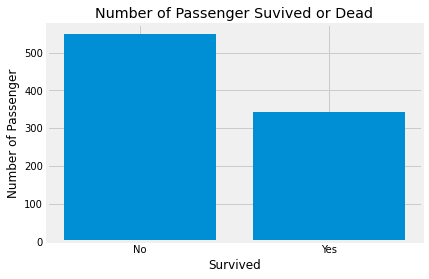

In [ ]:
df_surv_count =pd.DataFrame(train.groupby('Survived')['PassengerId'].count())

plt.bar(df_surv_count.index, df_surv_count.PassengerId, tick_label=['No', 'Yes'])

plt.xlabel('Survived')
plt.ylabel('Number of Passenger')
plt.title('Number of Passenger Suvived or Dead')

---------------------------------------------------------------

#Project Stage 2

##Part3. Data Transformation and EDA

###3.1. Transformation of the Data  [10 points]

Describe the transformations of the data you have applied if applicable. Why or Why not? [10 points]

First, in 2.2.f, issues that cause problems for faithfulness have been deleted or changed. And in order to clearly confirm the survival of each age group, the feature 'Age' was grouped by 10 years old.

**Remove Missing Data**

Deleted rows with null values ​​for train data reliability.

In [ ]:
train_drop_nan = train.dropna(axis=0)

In [ ]:
train_drop_nan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In the case of the test data, we need to predict the survival probability of all passengers in the data, so we fill in the area without data with the average value of the column.

In [ ]:
test['Age']=test['Age'].replace(np.nan, test['Age'].mean() )

**Change inappropriate data types**

Age cannot exist as a float value, so all Age values ​​have been transformed into int values.

In [ ]:
train_change_type=train_drop_nan
train_change_type.Age=train_drop_nan.Age.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train_change_type.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [ ]:
test.Age=test.Age.astype(int)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


**Change Undecided format**

Since Ticket values ​​exist in multiple formats, I changed the format to a numeric value.

In [ ]:
train_change_format=train_change_type
train_change_format.Ticket=train_change_type.Ticket.str.extract('(\d+)')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train_change_format.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S


In [ ]:
test.Ticket=test.Ticket.str.extract('(\d+)')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


**Devide Age Group**

By grouping ages, we made it possible to clearly confirm the survival of each age group.

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
bins_label =['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70~79', '80~']
train_change_format['Age_level'] = pd.cut(train_change_format['Age'], bins, right=False, labels=bins_label[:-1])

train_change_format.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C,30-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,30-39
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,50-59
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,9549,16.7000,G6,S,0-9
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,50-59


In [ ]:
test['Age_level'] = pd.cut(test['Age'], bins, right=False, labels=bins_label[:-1])

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,30-39
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,40-49
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,60-69
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,20-29
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,20-29


###3.2. Features to use [10 points]

What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason. [10 points]

####3.2.a. Age Group

The first feature chosen is **Age Group**. The reasons for choosing are as follows:

**Number of survived or dead passengers by age group**

In [ ]:
df_surv_Age_count =pd.DataFrame(train_change_format.groupby(['Age_level', 'Survived'])['PassengerId'].count())
df_surv_Age_count = df_surv_Age_count.reset_index()

df_surv_Age_count.head()


,Age_level,Survived,PassengerId
0,0-9,0,2
1,0-9,1,8
2,10-19,0,4
3,10-19,1,15
4,20-29,0,9


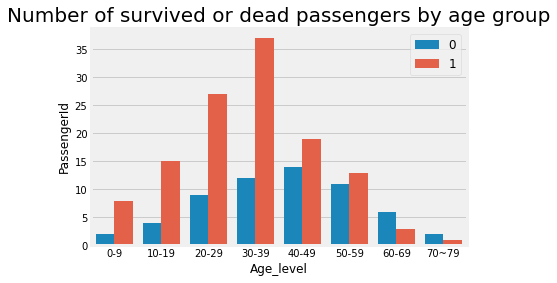

In [ ]:
sns.barplot(x='Age_level', y='PassengerId', hue='Survived', data=df_surv_Age_count) 
plt.title('Number of survived or dead passengers by age group', fontsize=20)
plt.legend(fontsize=12)

plt.show()


The graph above shows the number of living and dead by age as a bar plot.

If you look at this plot, young people survived more than dead people, but from over 60, more people died than survived people.

However, the graph above is difficult to see clearly because the number of people by age group is different. So I used percentage

**Percentage of survived or dead by age group**

In [ ]:
df_surv=train_change_format[train_change_format['Survived']==1]
df_dead=train_change_format[train_change_format['Survived']==0]

In [ ]:
df_surv_Age =pd.DataFrame(df_surv.groupby('Age_level')['PassengerId'].count())
df_dead_Age =pd.DataFrame(df_dead.groupby('Age_level')['PassengerId'].count())

In [ ]:
df_surv_Age_perc=np.multiply(np.divide(df_surv_Age, np.add(df_surv_Age, df_dead_Age)),100)
df_dead_Age_perc=np.multiply(np.divide(df_dead_Age, np.add(df_surv_Age, df_dead_Age)),100)

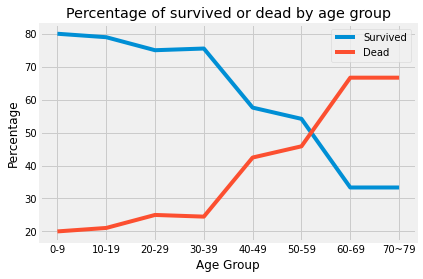

In [ ]:
plt.plot(df_surv_Age_perc.index, df_surv_Age_perc.PassengerId)
plt.plot(df_surv_Age_perc.index,df_dead_Age_perc.PassengerId)

plt.legend(['Survived', 'Dead'])
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of survived or dead by age group')
plt.show()

If you look at the graph above, you can see that the percentage of surviving by age group is higher as passenger are younger and lower as passenger are older.

####3.2.b. Sex

The second feature chosen is **Sex**. The reasons for choosing are as follows:

**Number of survived or dead passengers by sex**

In [ ]:
df_surv_Sex_count =pd.DataFrame(train_change_format.groupby(['Sex', 'Survived'])['PassengerId'].count())
df_surv_Sex_count = df_surv_Sex_count.reset_index()

df_surv_Sex_count.head()

,Sex,Survived,PassengerId
0,female,0,6
1,female,1,82
2,male,0,54
3,male,1,41


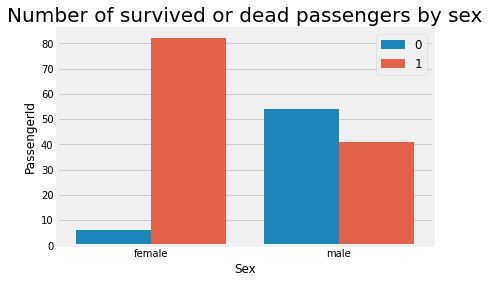

In [ ]:
sns.barplot(x='Sex', y='PassengerId', hue='Survived', data=df_surv_Sex_count) 
plt.title('Number of survived or dead passengers by sex', fontsize=20)
plt.legend(fontsize=12)

plt.show()

Looking at the bar plot above, male passengers have a little more dead people than survived ones, but most of the female passengers survived.

###3.3. Readiness of the Data [5 points]

Readiness of the data. [5 points] [HINT: for some models, the value range of your features can affect the model a lot. Data normalization may be needed, o.w., one feature with huge values may dominate the modeling effect]

**Adjusting the scope of the age group**

Although passengers were divided by age group, the number of passengers aged 0-20 and passengers over 50 were very small, so 0-10 and 10-20 were added together and 50-60, 60-70, 70-80 and 80 were combined.

In [ ]:
bins_read = [0, 20, 30, 40, 50, 100]
bins_read_label =['0-19', '20-29', '30-39', '40-49', '50~']
train_change_format['Age_read_level'] = pd.cut(train_change_format['Age'], bins_read, right=False, labels=bins_read_label)

train_change_format.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level,Age_read_level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C,30-39,30-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,30-39,30-39
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,50-59,50~
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,9549,16.7000,G6,S,0-9,0-19
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,50-59,50~


In [ ]:
df_surv_Age_read_count =pd.DataFrame(train_change_format.groupby(['Age_read_level', 'Survived'])['PassengerId'].count())
df_surv_Age_read_count = df_surv_Age_read_count.reset_index()

df_surv_Age_read_count

,Age_read_level,Survived,PassengerId
0,0-19,0,6
1,0-19,1,23
2,20-29,0,9
3,20-29,1,27
4,30-39,0,12
5,30-39,1,37
6,40-49,0,14
7,40-49,1,19
8,50~,0,19
9,50~,1,17


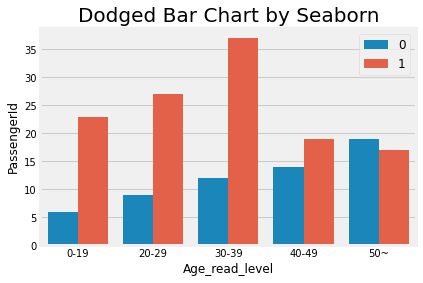

In [ ]:
sns.barplot(x='Age_read_level', y='PassengerId', hue='Survived', data=df_surv_Age_read_count) 
plt.title('Dodged Bar Chart by Seaborn', fontsize=20)
plt.legend(fontsize=12)

plt.show()

In [ ]:
test['Age_read_level'] = pd.cut(test['Age'], bins_read, right=False, labels=bins_read_label)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level,Age_read_level
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,30-39,30-39
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,40-49,40-49
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,60-69,50~
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,20-29,20-29
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,20-29,20-29


**Replace String with numeric value**

String values ​​cannot be trained, so the selected feature is replaced with a numeric value.

In [ ]:
train_change_format['Age_Group']= train_change_format['Age_read_level'].replace({'0-19':0, '20-29':20, '30-39':30, '40-49':40, '50~':50})
train_change_format['Sex_num']= train_change_format['Sex'].replace({'female':0, 'male':1})

train_change_format.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level,Age_read_level,Age_Group,Sex_num
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C85,C,30-39,30-39,30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,30-39,30-39,30,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,50-59,50~,50,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,9549,16.7000,G6,S,0-9,0-19,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,50-59,50~,50,0


In [ ]:
test['Age_Group']= test['Age_read_level'].replace({'0-19':0, '20-29':20, '30-39':30, '40-49':40, '50~':50})
test['Sex_num']= test['Sex'].replace({'female':0, 'male':1})
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_level,Age_read_level,Age_Group,Sex_num
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,30-39,30-39,30,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,40-49,40-49,40,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,60-69,50~,50,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,20-29,20-29,20,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,20-29,20-29,20,0


**Feature extraction**

Extracts only features to be used for train and test and converts them into dataframe.

In [ ]:
train= train_change_format.loc[:,['Survived', 'Age_Group', 'Sex_num']]

train.head()

,Survived,Age_Group,Sex_num
1,1,30,0
3,1,30,0
6,0,50,1
10,1,0,0
11,1,50,0


In [ ]:
test= test.loc[:,['Age_Group', 'Sex_num']]

test.head()

,Age_Group,Sex_num
0,30,1
1,40,0
2,50,1
3,20,1
4,20,0


##Part4. Modeling

###4.1. Select Model [5 points]

Describe the chosen model and why choose this one. [5 points]

**Logestic Regression**

I choose logistic regression model. 

Because the predicted outcome of this titanic project is one of survived ($1$) or died ($0$), I chose the binary classification technique, logestic regression.

###4.2. Relationship between Model and Feature [5 points]

Describe how the chosen features in 3.2 is involved in the chosen model. [5 points]

The regression equation for calculating the predicted value is as follow:

$$\Large p = \frac{1}{1 + e^{-(a+bx_1+cx_2)}}$$

In 3.2 I picked 2 features, Age Group ans Sex. 

So, our goal is to predict Survived with Age Group and Sex. Therefore, the relationship between the feature and logestic regression is to predict the Survived ($p$) for a specific Age Group ($x_1$) and Sex ($x_2$) by calculating the values ​​of $a, b, c$, when the age group is $x_1$, Sex is $x_2$, and survived is $p$. 

###4.2. Loss Function [5 points]

Describe the loss function that will be used to estimate the model's parameters. [5 points]

**Loss Fuction**:

$$L(y, \hat{y}) = -(y log\hat{y}+ (1-y)log(1-\hat{y}))$$

When estimating parameters in logistic regression, Maximun Likelihood Estimation is mainly used.

**Maximun Likelihood Estimation**

MLE is a probabilistic framework for estimating the parameters of a model.

$$likeliehood\ =\ L\left(a,b,c \right)\ =\ \prod _{i=1}^np_i^{y_i}\left(1-p_i\right)^{1-y_i}$$

$$\log \ likelihood\ =\ ll\left(a,b,c \right)\ =\ \sum _{i=1}^ny_i(a+{x_1}_ib+{x_2}_ic) -\log \left(1+e^{(a+{x_1}_ib+{x_2}_ic) }\right)$$



###4.3. Estimating the Parameters of the Model [5 points]

Use a specific way (different ways have been discussed in A3) to estimate the model's parameters. [5 points]

The method of estimating the parameter of logistic regression that I found is to estimate the parameter that gives the highest probability of likelihood with the original $y$ value and predicted probability $\hat{y}$. The following is a function to find liklihood.

In [ ]:
def likelihood(y, y_hat):
	return np.add(np.multiply(y_hat, y), np.multiply(np.subtract(1, y_hat), np.subtract(1, y)))

In [ ]:
y, y_hat = 1, 0.9
print(likelihood(y, y_hat))

0.9


The parameter of $\hat{y}$ that brings the largest value among the likelihoods obtained by this function is the optimal value.

### 4.4. Model Prediction [5 points]

Use the model estimated to conduct a submission to the Kaggle competition and screenshot your leaderboard position. [5 points] 

This is the screenshot my leader board position.

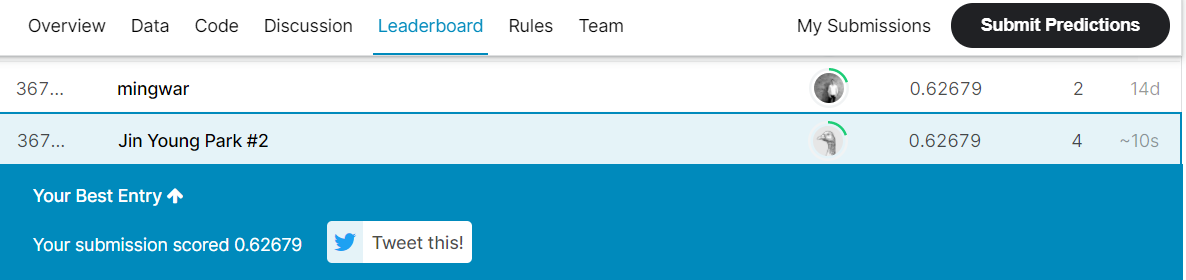

And the model prediction is as follows.

To measure the accuracy, I train-test-split the train data and predict it.

In [ ]:
from sklearn.model_selection import train_test_split 
train_sample, test_sample = train_test_split(sample, test_size=0.25, random_state=100)
x_train_sample = train_sample.drop('Survived', axis=1).values
y_train_sample = train_sample['Survived'].values
x_test_sample = test_sample.drop('Survived', axis=1).values
y_test_sample= test_sample['Survived'].values

print("Training Data Size: ", len(train_sample))
print("Test Data Size: ", len(test_sample))

Training Data Size:  137
Test Data Size:  46


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1680)
logistic_model.fit(x_train_sample, y_train_sample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1680,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = logistic_model.predict(x_train_sample)
y_test_pred = logistic_model.predict(x_test_sample)

print('Accuracy of training data:')
print(accuracy_score(y_train_sample, y_train_pred))
print('Accuracy of test data:')
print(accuracy_score(y_test_sample, y_test_pred))

Accuracy of training data:
0.7956204379562044
Accuracy of test data:
0.6956521739130435


Then, after training logestic regression with train data, the survivability of the passengers in the test data was predicted.

In [ ]:
x_train = train.drop('Survived', axis=1).values
y_train = train['Survived'].values

model = LogisticRegression(max_iter=1680)
model.fit(x_train, y_train)

y_pred = model.predict(test)

y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

The predicted results were output to a csv file.

In [ ]:
pred_result =pd.DataFrame({
    'PassengerId': test_a.PassengerId,
    'Survived': y_pred
})
pred_result.to_csv('titanic_test_Logistic_Regression_predict.csv', index=False) 